In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

import seaborn as sns

In [2]:
import plotly as py
import plotly.graph_objs as go

In [3]:
df = pd.read_csv('run_results.csv')

In [4]:
df

,title,runtime,genre,rating,votes,metascore
0,Spider-Man: No Way Home,148 min,"Action, Adventure, Fantasy",8.4,"626,167",71.0
1,Dune,155 min,"Action, Adventure, Drama",8.1,"563,930",74.0
2,The Black Phone,102 min,Horror,7.4,825,79.0
3,Sing 2,110 min,"Animation, Adventure, Comedy",7.4,"48,078",49.0
4,No Time to Die,163 min,"Action, Adventure, Thriller",7.3,"351,219",68.0
...,...,...,...,...,...,...
9995,Jattu Nikhattu,NaN,Biography,NaN,NaN,NaN
9996,Shoot to Saltara,120 min,Action,NaN,NaN,NaN
9997,Sette lune e un palmo di neve,NaN,Drama,NaN,NaN,NaN
9998,Insta-Lie,NaN,Drama,8.6,12,NaN


In [5]:
df = df.drop('runtime',axis=1)

In [6]:
df = df.replace({
    'votes':'[,$,M]'
},'',regex=True)

In [7]:
df['votes'] =df['votes'].astype(np.number)

In [8]:
df.dtypes

title         object
genre         object
rating       float64
votes        float64
metascore    float64
dtype: object

In [9]:
lst = []
for values in df.genre:
    print(values)
    lst.append(values)
lst

Action, Adventure, Fantasy
Action, Adventure, Drama
Horror
Animation, Adventure, Comedy
Action, Adventure, Thriller
Biography, Drama, Sport
Action, Adventure, Fantasy
Comedy, Drama, Music
Action, Adventure, Sci-Fi
Animation, Comedy, Family
Action, Adventure, Thriller
Crime, Drama, Thriller
Comedy, Drama, Romance
Action, Adventure, Comedy
Action, Crime, Thriller
Adventure, Comedy, Fantasy
Drama, War
Action, Adventure, Comedy
Crime, Drama, Musical
Comedy, Drama, Sci-Fi
Crime, Drama
Action, Crime, Drama
Action, Sci-Fi
Drama, Romance, Western
Action, Adventure, Fantasy
Action, Adventure, Fantasy
Comedy, Drama, Romance
Action, Adventure, Crime
Comedy, Drama, Romance
Action, Crime, Thriller
Action, Drama, History
Biography, Drama
Horror
Fantasy, Horror, Mystery
Drama, Horror, Mystery
Drama, Horror, Mystery
Adventure, Drama, Fantasy
Biography, Drama, Sport
Action, Adventure, Sci-Fi
Drama
Horror, Thriller
Drama
Action, Comedy, Thriller
Drama, Thriller
Drama
Drama, Mystery, Thriller
Biography, 

nan
Horror, Sci-Fi, Thriller
Comedy
Horror
Action
Comedy, Drama
Drama
Drama
Romance
Animation
Fantasy, Mystery
Drama
Animation, Family
Action, Drama
Action, Comedy, Musical
Comedy, Drama
Action, Thriller
Drama
Crime, Thriller
Comedy
Drama
Romance, Thriller
Horror
Comedy, Horror
Horror
Action
Comedy, Sport
Drama
Crime, Drama, Mystery
Drama
Drama
Crime, Drama
Crime
Drama, Mystery, Thriller
Comedy, Drama
Comedy, Drama, Romance
Drama
Drama
Thriller
Comedy, Crime, Horror
Drama, Romance
Thriller
Romance
Action, Adventure, Fantasy
Drama, Thriller
Drama
Adventure, Drama, Fantasy
Western
Comedy, Drama, Thriller
Drama
Romance
Adventure, Comedy, Horror
Horror, Thriller
Horror
Drama
Comedy
Comedy
Drama
Drama
Comedy, Drama
Comedy
Comedy, Drama
Drama
Comedy
Drama, Horror, Romance
Drama
Drama
Horror
Horror
Comedy, Drama
Comedy
Drama
Action
Sci-Fi
Horror
Romance
Comedy, Musical, Romance
Comedy
Comedy
Horror, Mystery, Thriller
Crime
Comedy
Comedy, Musical
Crime
Drama
Action
Horror, Thriller
nan
Comedy


Comedy, Drama
Romance
Action, Sci-Fi
Drama
Horror
Comedy
nan
Thriller
Drama, Romance
Drama
Musical
Horror, Thriller
Thriller
Drama
Drama
Drama
Comedy, Horror, Thriller
nan
Adventure, Fantasy
Biography
Drama, Thriller
nan
nan
Drama, Romance
Adventure, Sci-Fi
Drama
Drama
Thriller
Comedy
Horror
Music, Musical
Thriller
Mystery
Animation
Drama
Drama
Animation
Comedy, Horror
Thriller
Thriller
Horror
Drama, Thriller
Comedy, Horror
Comedy, Drama
Horror
Comedy
Drama
Action, Crime, Drama
Comedy
Comedy, Romance
Drama
Drama
Action
Drama
Comedy
Comedy
Drama
Drama
Horror
Drama
Mystery, Thriller
nan
Adventure, Sci-Fi
Drama
Comedy
Drama, Horror, Thriller
Drama
Comedy
Sci-Fi
Romance
Animation
Drama
Comedy, Drama
Comedy, Drama
Drama
Drama
Drama, Romance
Drama
Drama
Drama, Thriller
Music
Drama
Adventure
Thriller
Comedy
Drama
Drama
Thriller
Horror
Drama, Romance
Drama
Drama
Drama
Drama
Drama, Sport
Comedy, Drama
Drama
Crime
Action
Fantasy, Thriller
Drama
Drama, Horror, Sci-Fi
Drama, Romance, Thriller
Come

Drama
Drama
Comedy
Action
Drama
Thriller
Drama
Comedy
Mystery
nan
nan
Action, Comedy, Crime
Drama
Crime, Drama
Drama
Horror
War
nan
Comedy
Comedy, Drama
Crime, Drama, Thriller
Drama
Romance
Drama
Action
Drama
nan
Drama
Horror
Drama
Drama
Drama
Drama
Drama
Horror
nan
nan
Thriller
Drama
Drama
nan
Drama
Crime, Drama, Thriller
Drama
Drama
Drama
Drama
Drama
Drama
Animation, Comedy
Sci-Fi
Action
nan
Action
nan
Drama
Drama, Musical
Drama
Drama
Action, Fantasy, Horror
Music
nan
Drama
Comedy
Drama
Drama, Sci-Fi
Thriller
Action, Drama, Horror
Romance
Drama, Fantasy, Horror
nan
Adventure
nan
Drama
Adventure, Drama, Romance
Drama
Drama
nan
Action, Comedy, Drama
Crime
nan
Horror, Thriller
Action, Comedy, Crime
Drama
nan
Thriller
Horror
Thriller
Thriller
Romance
Drama
nan
Horror
Music
Drama
Drama
Comedy, Thriller
Drama, Horror
nan
Action
nan
Drama
Biography, Comedy, Crime
Drama
Drama
Action
nan
Animation
Drama
Comedy
Drama
Drama
Horror
Comedy
Drama
nan
Horror
Musical
Animation
Comedy
nan
Thriller
Co

['Action, Adventure, Fantasy',
 'Action, Adventure, Drama',
 'Horror',
 'Animation, Adventure, Comedy',
 'Action, Adventure, Thriller',
 'Biography, Drama, Sport',
 'Action, Adventure, Fantasy',
 'Comedy, Drama, Music',
 'Action, Adventure, Sci-Fi',
 'Animation, Comedy, Family',
 'Action, Adventure, Thriller',
 'Crime, Drama, Thriller',
 'Comedy, Drama, Romance',
 'Action, Adventure, Comedy',
 'Action, Crime, Thriller',
 'Adventure, Comedy, Fantasy',
 'Drama, War',
 'Action, Adventure, Comedy',
 'Crime, Drama, Musical',
 'Comedy, Drama, Sci-Fi',
 'Crime, Drama',
 'Action, Crime, Drama',
 'Action, Sci-Fi',
 'Drama, Romance, Western',
 'Action, Adventure, Fantasy',
 'Action, Adventure, Fantasy',
 'Comedy, Drama, Romance',
 'Action, Adventure, Crime',
 'Comedy, Drama, Romance',
 'Action, Crime, Thriller',
 'Action, Drama, History',
 'Biography, Drama',
 'Horror',
 'Fantasy, Horror, Mystery',
 'Drama, Horror, Mystery',
 'Drama, Horror, Mystery',
 'Adventure, Drama, Fantasy',
 'Biography, D

In [10]:
df.genre.duplicated().count().sum()

10000

In [11]:
df = df.drop_duplicates(subset='title', keep = 'first')

In [13]:
df.shape

(9842, 5)

In [14]:
df.genre.unique()

array(['Action, Adventure, Fantasy', 'Action, Adventure, Drama', 'Horror',
       'Animation, Adventure, Comedy', 'Action, Adventure, Thriller',
       'Biography, Drama, Sport', 'Comedy, Drama, Music',
       'Action, Adventure, Sci-Fi', 'Animation, Comedy, Family',
       'Crime, Drama, Thriller', 'Comedy, Drama, Romance',
       'Action, Adventure, Comedy', 'Action, Crime, Thriller',
       'Adventure, Comedy, Fantasy', 'Drama, War',
       'Crime, Drama, Musical', 'Comedy, Drama, Sci-Fi', 'Crime, Drama',
       'Action, Crime, Drama', 'Action, Sci-Fi',
       'Drama, Romance, Western', 'Action, Adventure, Crime',
       'Action, Drama, History', 'Biography, Drama',
       'Fantasy, Horror, Mystery', 'Drama, Horror, Mystery',
       'Adventure, Drama, Fantasy', 'Drama', 'Horror, Thriller',
       'Action, Comedy, Thriller', 'Drama, Thriller',
       'Drama, Mystery, Thriller', 'Biography, Drama, Musical',
       'Action, Horror, Sci-Fi', 'Adventure, Comedy, Crime',
       'Drama, Fa

In [15]:
df.head(1)

,title,genre,rating,votes,metascore
0,Spider-Man: No Way Home,"Action, Adventure, Fantasy",8.4,626167.0,71.0


In [16]:
df.isna().sum()

title           0
genre         358
rating       4191
votes        4187
metascore    9350
dtype: int64

In [17]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['title','genre']] = imp.fit_transform(df[['title','genre']])


In [18]:
nimp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['votes','metascore','rating']] = nimp.fit_transform(df[['votes','metascore','rating']])

In [19]:
df.isna().sum()

title        0
genre        0
rating       0
votes        0
metascore    0
dtype: int64

In [20]:
df[df.duplicated()].count()

title        0
genre        0
rating       0
votes        0
metascore    0
dtype: int64

In [21]:
df=df.drop_duplicates()

<Figure size 2160x1440 with 0 Axes>

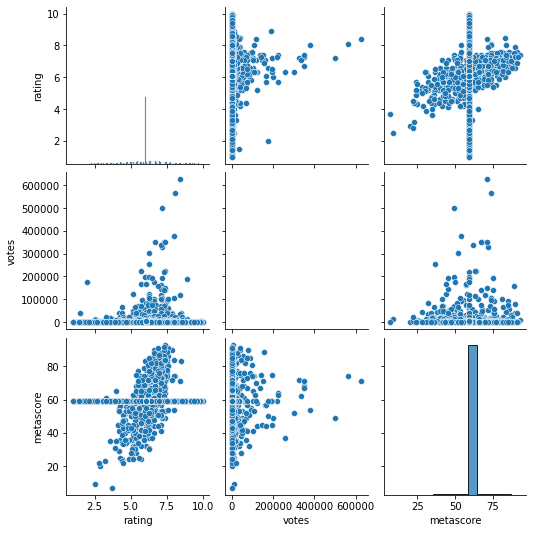

In [22]:
plt.figure(figsize=(30,20))
sns.pairplot(data=df)

In [23]:
df.head()

,title,genre,rating,votes,metascore
0,Spider-Man: No Way Home,"Action, Adventure, Fantasy",8.4,626167.0,71.0
1,Dune,"Action, Adventure, Drama",8.1,563930.0,74.0
2,The Black Phone,Horror,7.4,825.0,79.0
3,Sing 2,"Animation, Adventure, Comedy",7.4,48078.0,49.0
4,No Time to Die,"Action, Adventure, Thriller",7.3,351219.0,68.0


In [24]:
group = df.groupby('genre')

In [25]:
group

In [26]:
for  genre, genre_df in group:
    print(genre)
    print(genre_df)

Action
                              title   genre    rating        votes  metascore
130                        Fortress  Action  3.400000  3590.000000  59.178862
525          Every Last One of Them  Action  3.100000   572.000000  59.178862
890                           Dutch  Action  3.600000   430.000000  59.178862
895                Megalodon Rising  Action  2.000000   355.000000  59.178862
993                       Madhagaja  Action  4.900000   611.000000  59.178862
...                             ...     ...       ...          ...        ...
9901                          Apolo  Action  6.049885  3178.437181  59.178862
9908                 Land in Flames  Action  6.049885  3178.437181  59.178862
9962  Dark Intentions 4: Repentance  Action  6.049885  3178.437181  59.178862
9993          Real Madrid - Chelsea  Action  6.049885  3178.437181  59.178862
9996               Shoot to Saltara  Action  6.049885  3178.437181  59.178862

[291 rows x 5 columns]
Action, Adventure
               

7617  59.178862  
Adventure, Family, Fantasy
                               title                       genre    rating  \
1798  The Great Yokai War: Guardians  Adventure, Family, Fantasy  5.700000   
6665   Martin and the Magical Forest  Adventure, Family, Fantasy  5.600000   
7838              Ledyanaya istoriya  Adventure, Family, Fantasy  6.049885   

            votes  metascore  
1798    44.000000  59.178862  
6665    18.000000  59.178862  
7838  3178.437181  59.178862  
Adventure, Family, Music
                                     title                     genre  \
9305  Khroniki Deda Moroza. Tayna podarkov  Adventure, Family, Music   

        rating        votes  metascore  
9305  6.049885  3178.437181  59.178862  
Adventure, Family, Sci-Fi
            title                      genre  rating   votes  metascore
286  Captain Nova  Adventure, Family, Sci-Fi     5.5  1232.0  59.178862
Adventure, Fantasy
                                title               genre    rating  \
1050  

                                                  title  \
2213                                             Ashman   
7035                                              Phase   
7708  Lamp the Movie (That Really Shouldn't Exist); ...   

                        genre    rating        votes  metascore  
2213  Comedy, Fantasy, Sci-Fi  5.600000    84.000000  59.178862  
7035  Comedy, Fantasy, Sci-Fi  6.049885  3178.437181  59.178862  
7708  Comedy, Fantasy, Sci-Fi  6.049885  3178.437181  59.178862  
Comedy, Horror
                                                  title           genre  \
283                                        Black Friday  Comedy, Horror   
373                              All My Friends Hate Me  Comedy, Horror   
429                                   Some Like It Rare  Comedy, Horror   
456                                              Crabs!  Comedy, Horror   
557                                         King Knight  Comedy, Horror   
...                               

                      title   genre    rating        votes  metascore
232   The Wolf and the Lion  Family  5.900000  1379.000000  36.000000
1008   Courting Mom and Dad  Family  3.500000   173.000000  59.178862
1338       Buckley's Chance  Family  5.600000   243.000000  59.178862
1396           Berend Botje  Family  7.900000    58.000000  59.178862
1698        Project Pay Day  Family  5.900000   106.000000  59.178862
...                     ...     ...       ...          ...        ...
9216          Kadal Kuthira  Family  6.049885  3178.437181  59.178862
9293                    Bha  Family  6.049885  3178.437181  59.178862
9360             Chal ji le  Family  6.049885  3178.437181  59.178862
9696    Kaliyuga Sutradhari  Family  6.049885  3178.437181  59.178862
9702                Parangi  Family  6.049885  3178.437181  59.178862

[145 rows x 5 columns]
Family, Animation
                title              genre  rating  votes  metascore
2315  Finding Jesus 2  Family, Animation     4.5   

In [27]:
group.get_group('Action')

,title,genre,rating,votes,metascore
130,Fortress,Action,3.400000,3590.000000,59.178862
525,Every Last One of Them,Action,3.100000,572.000000,59.178862
890,Dutch,Action,3.600000,430.000000,59.178862
895,Megalodon Rising,Action,2.000000,355.000000,59.178862
993,Madhagaja,Action,4.900000,611.000000,59.178862
...,...,...,...,...,...
9901,Apolo,Action,6.049885,3178.437181,59.178862
9908,Land in Flames,Action,6.049885,3178.437181,59.178862
9962,Dark Intentions 4: Repentance,Action,6.049885,3178.437181,59.178862
9993,Real Madrid - Chelsea,Action,6.049885,3178.437181,59.178862


In [28]:
group.max()

,title,rating,votes,metascore
genre,,,,
Action,Õiglus 2,9.800000,9579.000000,59.178862
"Action, Adventure",Thief female Hero,8.900000,3178.437181,59.178862
"Action, Adventure, Biography",Amina,3.900000,290.000000,59.178862
"Action, Adventure, Comedy",Zack: Enfrentamiento Mortal,8.700000,336012.000000,72.000000
"Action, Adventure, Crime",Wild Dog,8.700000,60898.000000,72.000000
...,...,...,...,...
"Thriller, War",Zeros and Ones,3.300000,1875.000000,61.000000
"Thriller, Western",Skinwalker,3.600000,244.000000,59.178862
War,Verraderlijke Liefde,9.400000,3178.437181,59.178862


In [29]:
import dash 
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

C:\Users\GYELTS~2\AppData\Local\Temp/ipykernel_8012/812526194.py:2: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\GYELTS~2\AppData\Local\Temp/ipykernel_8012/812526194.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [30]:
# app = dash.Dash()


# #set up the app layout

# app.layout = html.Div(children =[
#     html.H1(children = 'MOvie Rating analysis'),
#     dcc.Dropdown(id = 'Genre',
                
#                 options=[{'label':i, 'vlaue':i}
#                          for i in df['genre'].unique()],
#                  value = 'Action'),
#     dcc.Graph(id = 'genred')
    
    
# ])

# #set up the call back function
# @app.callback(
#     Output(component_id='genred', component_property='figure'),
#     Input(component_id='Genre', component_property='value')
    

# )

# def update_graph(selected_genre):
    
#     filtered_genre = df[df['genre']==selected_genre]
#     line_fig = px.line(filtered_genre,
#                       x='votes',y='rating',
                      
                  
#                       title = f'Genre type {selected_genre}')
                      
                       
#     return line_fig
# if __name__=='__main__':
#     app.run_server()
                       
                      
                                                                  

In [31]:
action =group.get_group('Action')

In [32]:
action

,title,genre,rating,votes,metascore
130,Fortress,Action,3.400000,3590.000000,59.178862
525,Every Last One of Them,Action,3.100000,572.000000,59.178862
890,Dutch,Action,3.600000,430.000000,59.178862
895,Megalodon Rising,Action,2.000000,355.000000,59.178862
993,Madhagaja,Action,4.900000,611.000000,59.178862
...,...,...,...,...,...
9901,Apolo,Action,6.049885,3178.437181,59.178862
9908,Land in Flames,Action,6.049885,3178.437181,59.178862
9962,Dark Intentions 4: Repentance,Action,6.049885,3178.437181,59.178862
9993,Real Madrid - Chelsea,Action,6.049885,3178.437181,59.178862


In [33]:
action.isna().sum()

title        0
genre        0
rating       0
votes        0
metascore    0
dtype: int64

<AxesSubplot:>

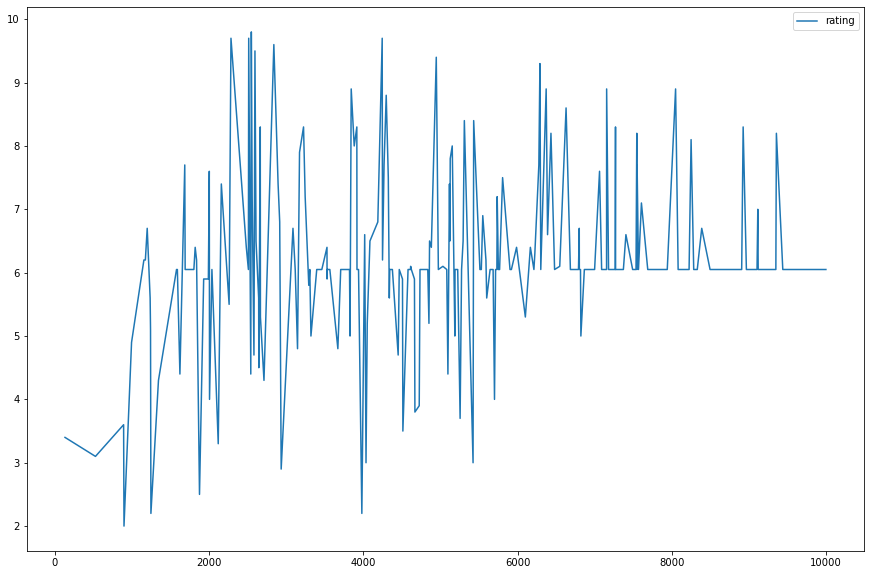

In [34]:
action[['title','rating']].plot(figsize= (15,10))

<AxesSubplot:xlabel='rating', ylabel='votes'>

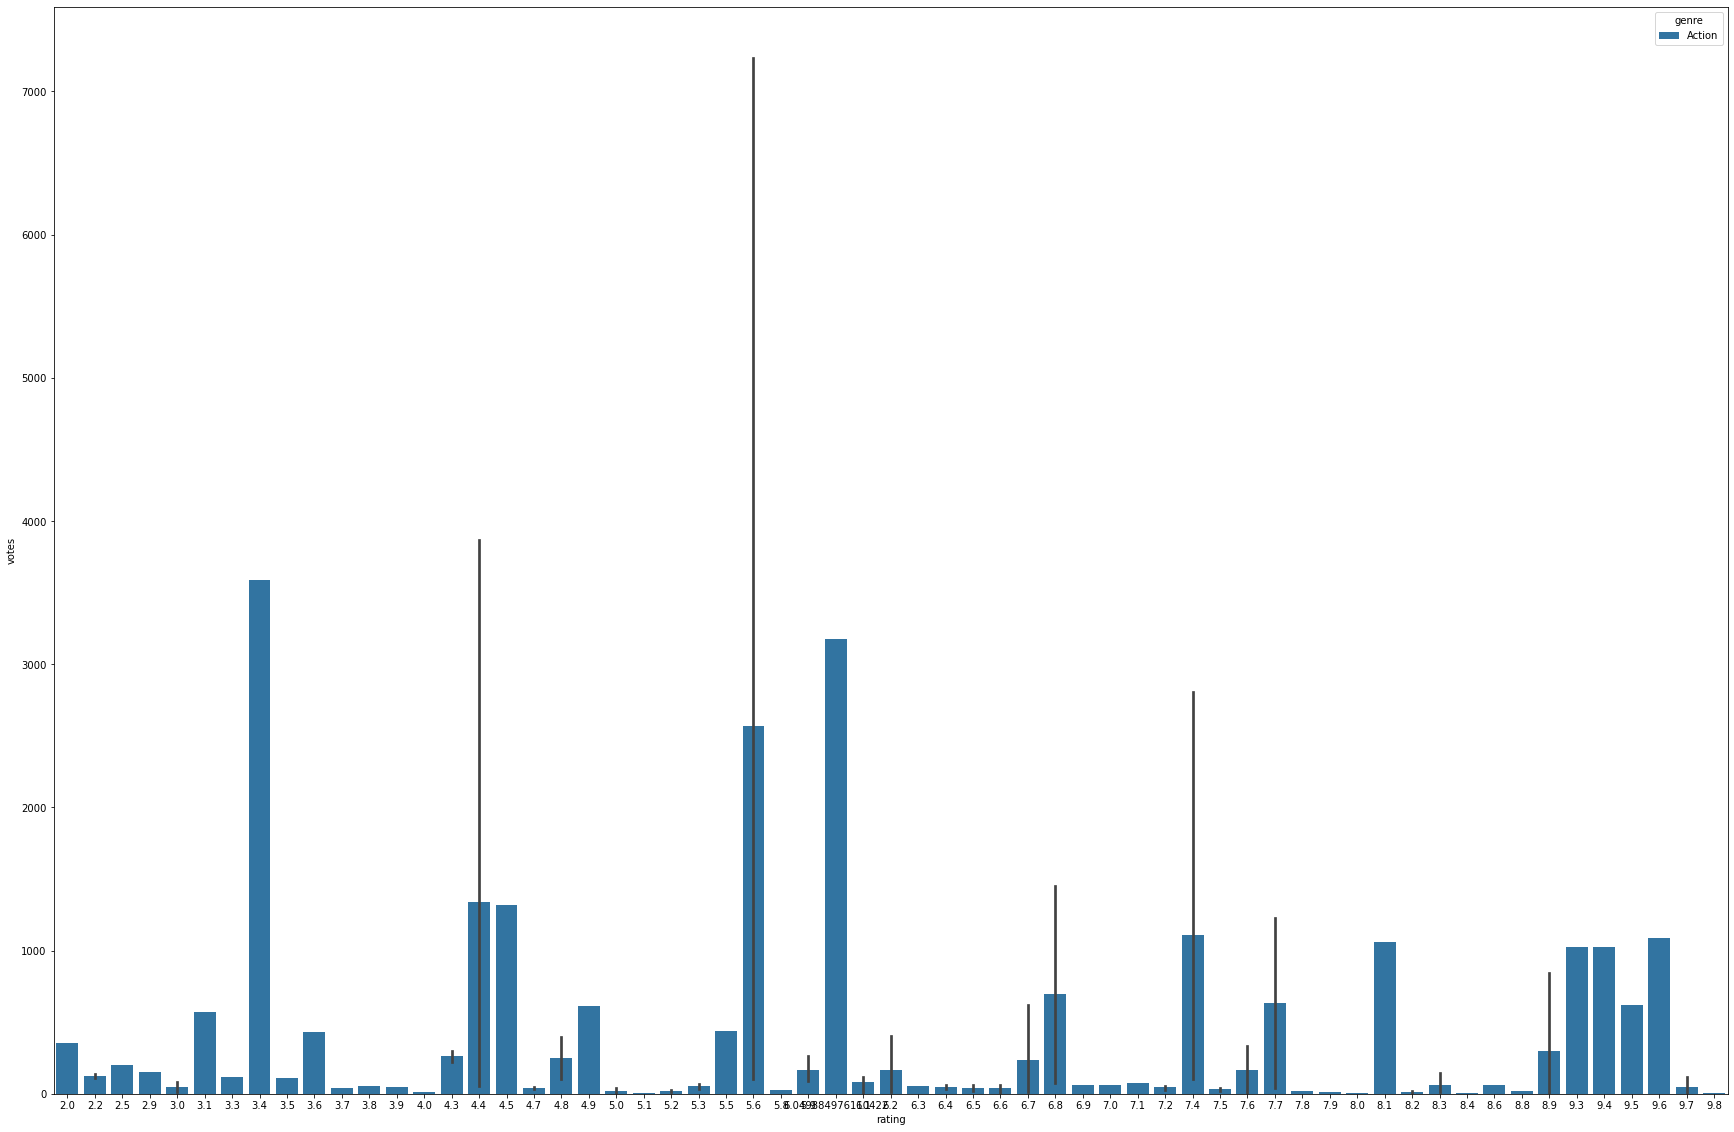

In [35]:
plt.figure(figsize=(30,20))
sns.barplot( data = action,y = 'votes', x = 'rating',hue='genre')



In [36]:
# advanture

advanture = group.get_group('Adventure')

In [37]:
advanture

,title,genre,rating,votes,metascore
1393,Hatched,Adventure,4.400000,455.000000,59.178862
1720,Into the Night,Adventure,6.049885,3178.437181,59.178862
2535,"Caution, Hazardous Wife: The Movie",Adventure,5.700000,228.000000,59.178862
2870,Monsters of War,Adventure,3.200000,140.000000,59.178862
3439,Idhe Maa Katha,Adventure,8.400000,1227.000000,59.178862
...,...,...,...,...,...
9587,Dubara,Adventure,6.049885,3178.437181,59.178862
9691,Liverpool vs Brighton and Hove Albion,Adventure,6.049885,3178.437181,59.178862
9728,Família Craft e o Código da 20,Adventure,8.100000,14.000000,59.178862
9759,Stellar Reviews Life is Strange - Chapter 4,Adventure,6.049885,3178.437181,59.178862


<AxesSubplot:xlabel='rating', ylabel='votes'>

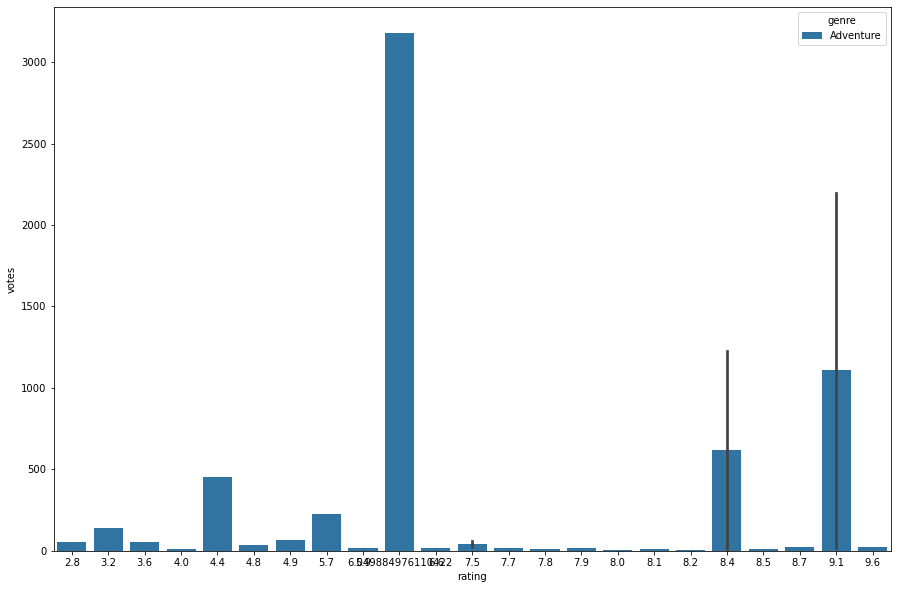

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(data = advanture, y = 'votes', x = 'rating', hue = 'genre')

<AxesSubplot:xlabel='metascore', ylabel='votes'>

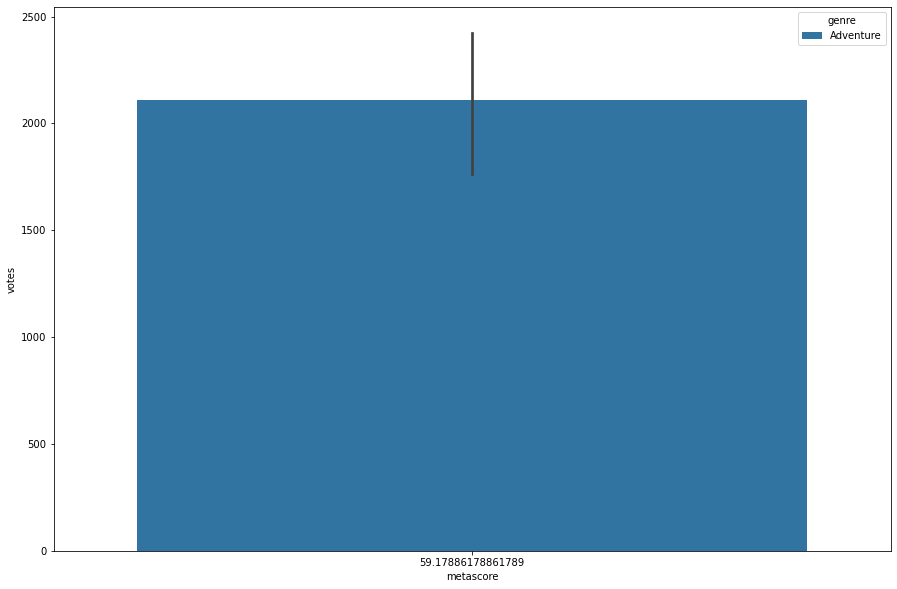

In [42]:
plt.figure(figsize=(15,10))
sns.barplot(data = advanture, y = 'votes', x = 'metascore', hue = 'genre')